In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.mnist import Mnist

# MNIST - DataBase

## Resumen
El conjunto de datos MNIST es un conjunto de datos de referencia ampliamente utilizado en el campo del aprendizaje automático. Consiste en una colección de 70,000 dígitos escritos a mano, cada uno representado como una imagen en escala de grises de 28x28 píxeles. El conjunto de datos se divide en tres conjuntos: conjunto de entrenamiento (60.000 imágenes), conjunto de validación (10.000 imágenes) y conjunto de prueba (10.000 imágenes).

El conjunto de datos MNIST se utiliza comúnmente para tareas como clasificación de imágenes y reconocimiento de dígitos. Se ha convertido en un conjunto de datos estándar para evaluar el rendimiento de los algoritmos de aprendizaje automático, especialmente en el campo de la visión por computadora. El conjunto de datos proporciona un recurso valioso para investigadores y profesionales para desarrollar y probar sus modelos. Ha desempeñado un papel importante en el avance del campo del aprendizaje profundo y se ha utilizado para entrenar y evaluar diversas arquitecturas de redes neuronales. El conjunto de datos MNIST es fácilmente accesible y se puede cargar utilizando bibliotecas como TensorFlow y PyTorch. Sirve como punto de partida para muchos proyectos de aprendizaje automático y proporciona una base sólida para comprender e implementar algoritmos de clasificación de imágenes.


## Introducción
Las imágenes en el conjunto de datos MNIST son representadas por 28x28 píxeles. Este formato resulta impractico en el entrenamiento de modelos de redes neuronales. Para ello se transforma a cada imagen en un vector de 784 componentes. Esta cantidad es igual a la cantidad total de píxeles, i.e. $784 = 28 \times 28$. Matemáticamente, se representa a cada imagen como un vector en un espacio vectorial. Cada píxel se corresponde con una característica, y la imagen completa puede verse como un punto en el espacio de características. Por lo tanto, cada imagen se escribe como $x_i \in \mathbb{R}^d$ con $d=784$ y $i \in [1, \ldots, N]$ siendo $N$ el número de imágenes. Cada píxel describe la intensidad en la escala de grises, siendo $0$ y $255$ los valores asignados al negro y blanco, respectivamente.

El número de clases es 10, correspondientes a los dígitos del 0 al 9. Cada imagen es etiquetada con su respectivo dígito, indicando la clase a la cual pertenece. En consecuencia, se tiene con un problema de clasificación multiclase. Se propone utilizar un modelo de red neuronal artificial, con capas completamente conectadas. La capa de ingreso tendrá 784 neuronas, coincidente con la dimensión del espacio vectorial de las imágenes. La capa de salida tendrá 10 neuronas, una para cada clase. En principio se plantea utilizar una sola capa oculta con 30 neuronas. Luego se modelará esta variable como un hyper-parámetro a determinar. Además, se proponen otros hyper-parámetros, como la tasa de aprendizaje $\eta$ y el factor de regularización $\lambda$. Posteriormente se prueba agregar capas ocultas adicionales, con la misma cantidad de neuronas, con el objetivo de evaluar el fenómeno de *vanishing gradient* (desvanecimiento del gradiente).

En el análisis de datos en esta *notebook* se plantea hacer una exploración estadístico de los mismos. Se comienza con un análisis basico sobre la distribucion de las clases y de los píxeles, para luego realizar una análisis más profundo con reducción de dimensionalidad.

In [2]:
# Load the MNIST dataset and create a new instance of the Mnist class
db = Mnist(fileName='data/mnist.pkl.gz')

In [3]:
# Print same information about the dataset
print('Number of training images:', db.n_samples_train)
print('Number of validation images:', db.n_samples_val)
print('Number of test images:', db.n_samples_test)
print('Number of features:', db.n_features)
print('Number of classes:', db.n_classes)
print('Classes:', db.classes)

Number of training images: 50000
Number of validation images: 10000
Number of test images: 10000
Number of features: 784
Number of classes: 10
Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


A continuación se muestra una imagen de los 100 primeros dígitos del conjunto de datos de entrenamiento. Se puede observar que las imágenes son en la escala de grises y representan dígitos escritos a mano. Se observa con claridad la variedad dentro de la misma clase, debido a la imperfección de la mano humana, como si se tuvieran distintos diseños de dígitos para cada una de las clases.

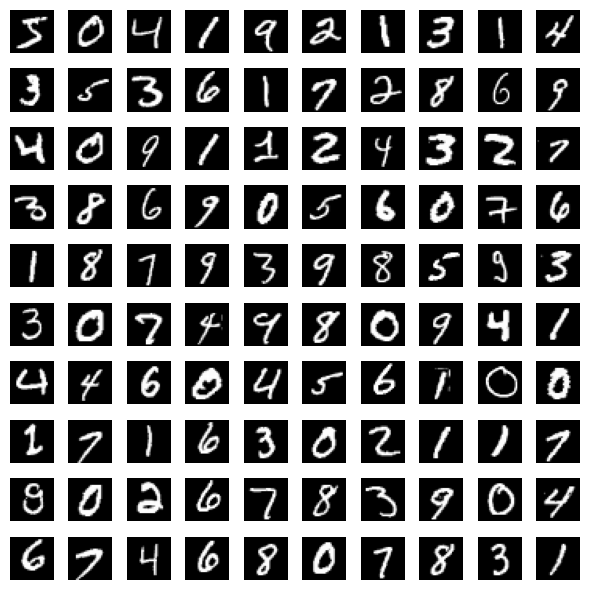

In [8]:
# plot first 100 images
Mnist.plotDigits(db.X_train[:100], max_cols=10, figsize=(6, 6), 
                 file_name='figures/analysis/first_100_images.png')

### Momentos


In [4]:
# Get and print the full dataset moments (the first four moments)
moments = db.getMoments()
print('1st moment (mean): {:.2f}'.format(255*moments[0]))
print('2nd moment (variance): {:.2f}'.format(255*moments[1]))
print('3rd moment (skewness): {:.2f}'.format(moments[2]))
print('4th moment (kurtosis): {:.2f}'.format(moments[3]))

1st moment (mean): 33.26
2nd moment (variance): 78.35
3rd moment (skewness): 2.15
4th moment (kurtosis): 5.90


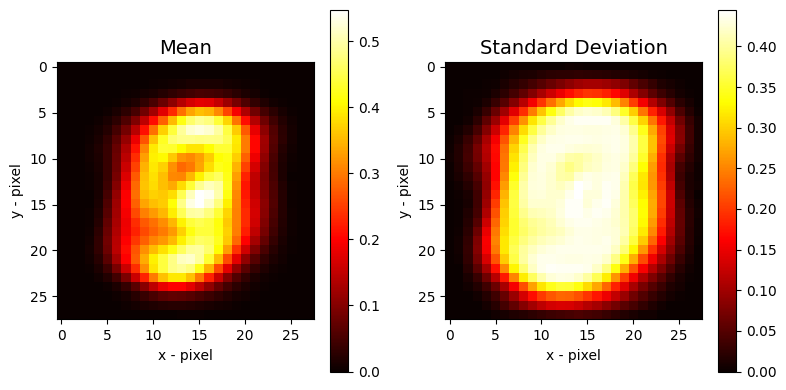

In [5]:
# plot two subplots, one with the mean and one with the standard deviation
inputs = np.vstack([db.X_train, db.X_val, db.X_test])
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
mean_cmap = ax[0].imshow(inputs.mean(axis=0).reshape(28, 28), cmap='hot')
fig.colorbar(mean_cmap, ax=ax[0], orientation='vertical')
ax[0].set_xlabel('x - pixel', fontsize=10)
ax[0].set_ylabel('y - pixel', fontsize=10)
ax[0].set_title('Mean', fontsize=14)
std_cmap = ax[1].imshow(inputs.std(axis=0).reshape(28, 28), cmap='hot')
fig.colorbar(std_cmap, ax=ax[1], orientation='vertical')
ax[1].set_xlabel('x - pixel', fontsize=10)
ax[1].set_ylabel('y - pixel', fontsize=10)
ax[1].set_title('Standard Deviation', fontsize=14)
plt.tight_layout()
plt.savefig('figures/analysis/mean_std_pixel.png')
plt.show()

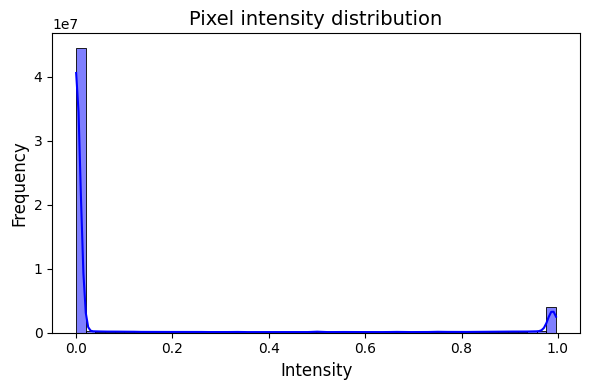

In [6]:
# print pixel itensity distribution
inputs = np.vstack([db.X_train, db.X_val, db.X_test])
inputs_flatten = inputs.reshape(-1)
fig = plt.figure(figsize=(6, 4))
sns.histplot(inputs_flatten, kde=True, bins=50, color='blue')
plt.title('Pixel intensity distribution', fontsize=14)
plt.xlabel('Intensity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('figures/analysis/pixel_intensity_dist.png')
plt.show()

Al observar el gráfico de la distribución de intensidad de los píxeles, notamos que la distribución es bimodal: presenta dos colas, una pesada y otra más ligera. La mayoría de los píxeles tienen intensidades muy bajas, cercanas a 0 (negro), con una proporción de píxeles que disminuye a medida que la intensidad aumenta, y una cola más ligera en la intensidad más alta (blanco). La cola derecha sugiere la existencia de píxeles con intensidades muy altas, que, según lo que sabemos del conjunto de datos MNIST, corresponden a las áreas blancas que representan los dígitos dibujados.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


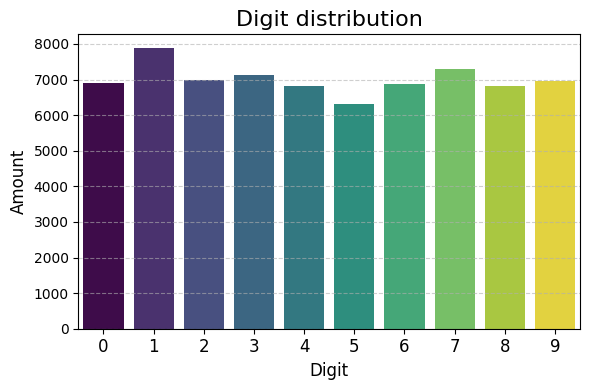

In [7]:
# plot a bar chart with the number of samples per class
db.barPlot(file_name='figures/analysis/barplot_samples_per_class.png')

La distribución de clases en MNIST está relativamente balanceada, lo que significa que cada dígito está representado de manera equitativa en el conjunto de datos. Un punto interesante a destacar con respecto a la variable de salida (dígitos) es si podríamos pensar que algunos dígitos son más fáciles de clasificar que otros. Por ejemplo, el dígito 1 podría ser relativamente fácil de identificar (ya que su forma es bastante uniforme) en comparación con la distinción entre un 5 y un 2, o un 3 y un 8.

### BoxPlot

El gráfico de boxplot es una herramienta visual que nos permite analizar la distribución de un conjunto de datos. En el caso específico de MNIST, que es un conjunto de datos de imágenes de dígitos escritos a mano, el gráfico de boxplot nos ayudaría a entender la distribución de los valores de los píxeles en las imágenes. En un gráfico de boxplot, se representa la distribución de los datos a través de una caja rectangular y dos líneas llamadas bigotes. La caja representa el rango intercuartil (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). La línea en el medio de la caja representa la mediana. Los bigotes se extienden desde la caja y representan el rango de los datos, excluyendo los valores atípicos. Los valores atípicos se muestran como puntos individuales más allá de los bigotes.

En nuestro caso, hemos representado la distrbución de píxeles dentro de cada clase, relativa a su media, en distancia euclidea o norma L2. A continuación se muestra un gráfico *box-plot* con las 10 clases. Se observa que todas las clases presentan *outliers* (valores atípicos), siendo las clases 1, 4 y 9 las que mayor cantidad presentan. Por otro lado, la clase 1 presenta la menor varianza (relación entre las imagenes y su esperanza), esto puede intuirse por la forma geométrica bien definida del número en cuestión, en comparación con el resto de las clases.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


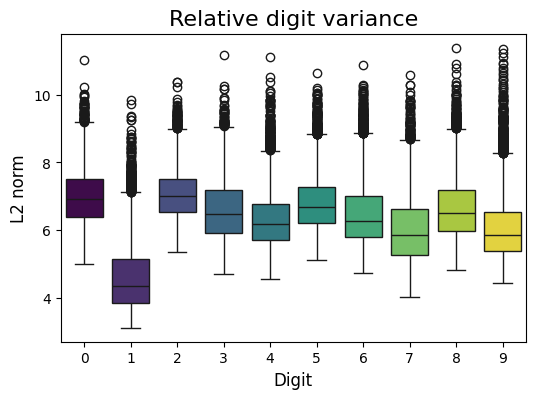

In [8]:
# plot box plots: relative L2 norm against mean image for each class
db.boxPlot(file_name='figures/analysis/boxplot_samples_per_class.png')

### Reducción de dimensionalidad

**PCA - Varianza explicada**: En este grafico se muestra el porcentaje de la varianza total que es explicada por cada componente principal, el cual nos ayuda a decidir cuántas componentes principales necesitamos para capturar un cierto porcentaje de la varianza total. Por ejemplo, si queremos una varianza del 90%, necesitamos recolectar los primeros autovalores de la matriz de covarianza, de mayor a menor, que acumulen el porcentaje relativo de varianza deseado. Cada autovalor se corresponde con una componente principal. Si quiero conervar el 100% de varianza, recolectaré todas las componentes principales y por lo tanto se conserva la dimension del problema.

En el gráfico observamos que con 331 componentes se explica el 99% de la varianza, es decir, con estas dimensiones obtenemos casi la misma información que con el total de 784 componentes originales. Por otro lado, con 154 componentes se logra obtener el 95% de la varianza, lo que implica una buena reducción de dimensionalidad con solo una pérdida del 5% de la varianza en los datos. Por último, destacamos la importancia de los primeros 87 componentes principales, que aportan ya un 90% de la varianza, lo que implica una gran cantidad de información acumulada para lograr clasificar las entradas de este dataset de manera eficiente.

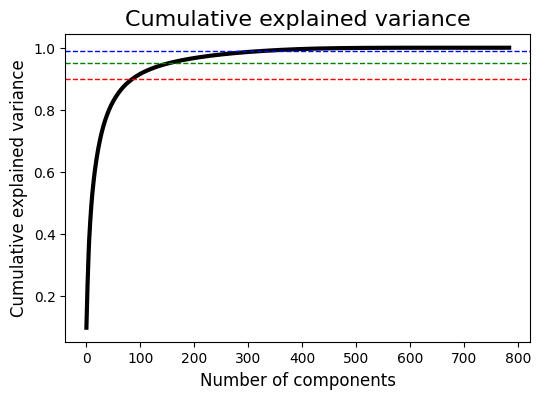

In [9]:
# cumulative explained variance
db.plotCumulativePCA(file_name='figures/analysis/cumulative_explained_variance.png')

In [5]:
print("Number of components needed to explain 90% of the variance:", db.getNumComponentsPCA(0.90))
print("Number of components needed to explain 95% of the variance:", db.getNumComponentsPCA(0.95))
print("Number of components needed to explain 99% of the variance:", db.getNumComponentsPCA(0.99))

Number of components needed to explain 90% of the variance: 87
Number of components needed to explain 95% of the variance: 154
Number of components needed to explain 99% of the variance: 331


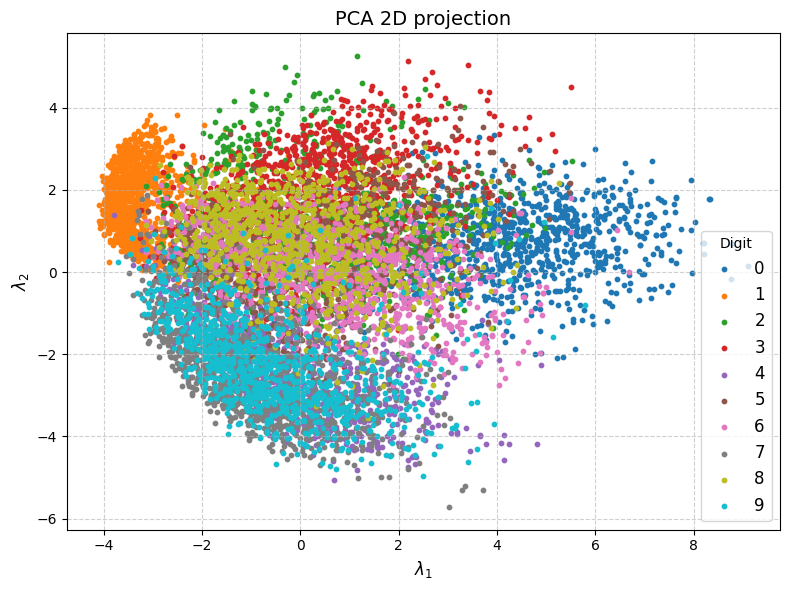

In [10]:
# plot 2D PCA
db.plot2dPCA(samples=10000, file_name='figures/analysis/2D_PCA.png')

### T-SNE (t-distributed Stochastic Neighbour Embedding)
El objetivo de t-SNE es capturar la estructura subyacente de los datos, preservando la similitud entre muestras en el espacio de alta dimensión y proyectándolas en un espacio de baja dimensión de manera que las muestras similares sigan siendo cercanas y las muestras disímiles se alejen entre sí.

El algoritmo de t-SNE se basa en dos pasos principales:

Construcción de distribuciones de probabilidad conjunta: En el espacio de alta dimensión, t-SNE calcula la similitud entre todas las pares de muestras. Esto se hace utilizando una medida de similitud, como la distancia euclidiana, que se convierte en una probabilidad de similitud utilizando una función de kernel Gaussiano. Esto genera una distribución de probabilidad conjunta que representa la similitud entre todas las pares de muestras en el espacio de alta dimensión.

Reducción de la divergencia de Kullback-Leibler: En el espacio de baja dimensión, t-SNE intenta minimizar la divergencia de Kullback-Leibler entre la distribución de probabilidad conjunta en el espacio de alta dimensión y la distribución de probabilidad conjunta en el espacio de baja dimensión. Esto se hace iterativamente, ajustando la ubicación de las muestras en el espacio de baja dimensión para minimizar la diferencia entre las distribuciones de probabilidad conjunta en ambos espacios.

El algoritmo se optimiza iterativamente utilizando gradient descent, ajustando la ubicación de las muestras en el espacio de baja dimensión para minimizar la divergencia de Kullback-Leibler. Durante el proceso de optimización, las muestras se atraen entre sí si tienen una alta probabilidad de similitud en el espacio de alta dimensión, y se repelen entre sí si tienen una baja probabilidad de similitud.

/Users/aperezwinter/Desktop/naiveNN/venv/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 20] Not a directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/Users/aperezwinter/Desktop/naiveNN/venv/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/Librar

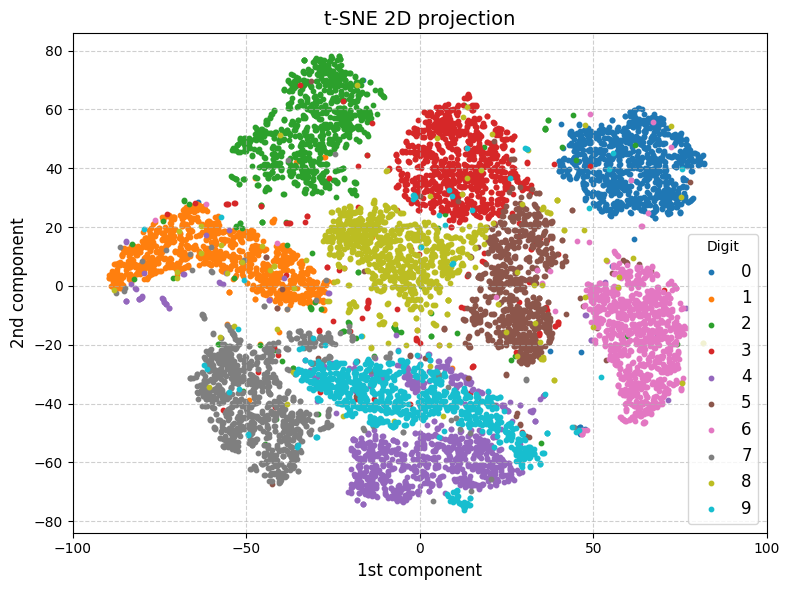

In [11]:
# plot 2D t-SNE
db.plot2dTSNE(samples=10000, file_name='figures/analysis/2D_tSNE.png')

### Visualización de los primeros 10 autovectores
Los primeros 10 autovectores (también conocidos como componentes principales) de la matriz de covarianza de los datos MNIST se pueden visualizar como imágenes. Las imágenes generadas a partir de los primeros 10 componentes principales suelen mostrar patrones que se asemejan a estructuras de los dígitos. Estos componentes representan las "bases" principales en las cuales se pueden reconstruir las imágenes originales con menor error. En términos de análisis, estos componentes indican las características más importantes que diferencian a un dígito de otro en el conjunto de datos MNIST.

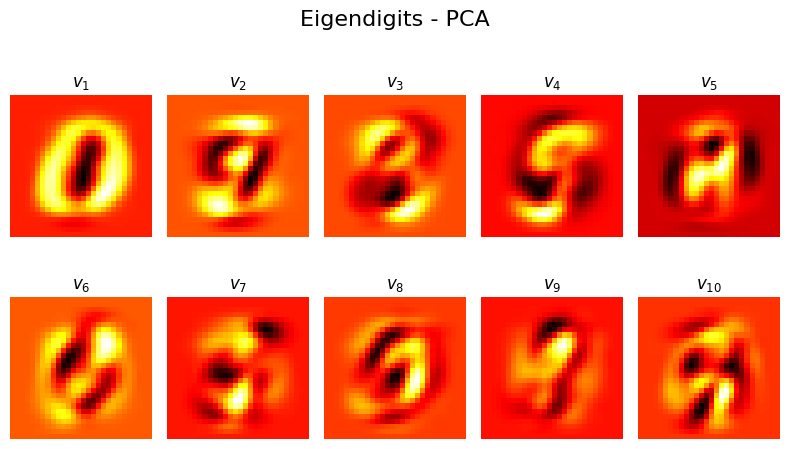

In [12]:
# plot some eigendigits
db.plotEigenDigits(n_components=10, file_name='figures/analysis/eigendigits.png')

In [ ]:
N = 32
for cl in db.classes:
    inputs, labels = db.filter(label=cl, set='train')
    Mnist.plotDigits(inputs[:N], max_cols=8, file_name='figures/analysis/class_{}.png'.format(cl), figsize=(8, 4))